# Process Data

We use data from the paper *Searching for Collective Behavior in a Large Network of Sensory Neurons*, which was made available at [research explorer](https://research-explorer.app.ist.ac.at/record/5562
). A description of the data is as follows:
> a .txt file containing the same data represented as an array with dimensions “number of neurons” x “number of samples”, where the number of samples is equal to the product of the number of repeats and timebins within a repeat. The time dimension is divided into 20 ms time windows, and the array is binary indicating whether a given cell elicited at least one spike in a given time window during a particular repeat.

There were 953 time bins per stimulus and 297 repeats, hence a total of 283041 samples.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from numba import njit, prange

In [2]:
arr = np.load("Data2014.npy") #load the data

In [3]:
arr.dtype

dtype('int64')

In [4]:
N,M = arr.shape # get the array's shape

In [14]:
N_T = 953 # number of bins per trial

In [8]:
print(N,M,953*297)

160 283041 283041


## Visualise data

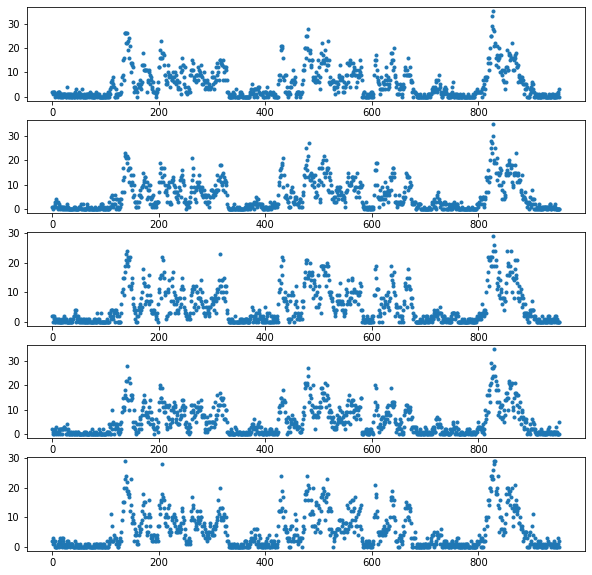

In [21]:
#plt how many neurons fire in each time bin over first few trials
trials_to_plot = 5
f,axes = plt.subplots(trials_to_plot,1,figsize=(10,10))
for i in range(trials_to_plot):
    axes[i].plot(np.sum(arr,axis=0)[i*N_T:(i+1)*N_T],".")
plt.show()

## Averages

In [5]:
avgs = np.mean(arr,axis=1) # get the mean firing of neurons

In [6]:
def summary(arr):
    print( "Mean", np.mean(arr), "S.D.", np.std(arr), "Min", np.min(arr), "Max", np.max(arr), sep="\n" )

In [7]:
summary(avgs)

Mean
0.03582599340731555
S.D.
0.029243356626643006
Min
0.0010881815708678247
Max
0.16249942587822966


In [8]:
def hist(arr,title,bins=50):
    plt.hist(arr,bins)
    plt.ylabel("Count")
    plt.title(title)
    plt.show()

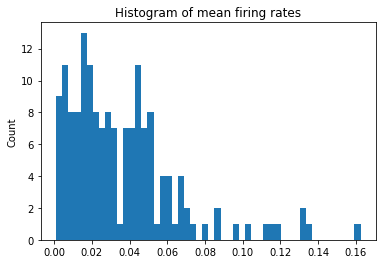

In [9]:
hist(avgs,"Histogram of mean firing rates")

## Correlations

In [10]:
@njit(parallel=True)
def correlations(arr):
    N, M = arr.shape
    corrs = np.zeros((N,N))
    for i in prange(N-1):
        for j in prange(i+1,N):
            corrs[i,j]=np.sum(arr[i]*arr[j])    
    return corrs / M

In [11]:
corr_mat = correlations(arr) #correlation matrix
corrs = corr_mat[np.triu_indices_from(corr_mat,k=1)]

In [12]:
summary(corrs)

Mean
0.0025622699082709513
S.D.
0.004014730327979542
Min
0.0
Max
0.07505273087644546


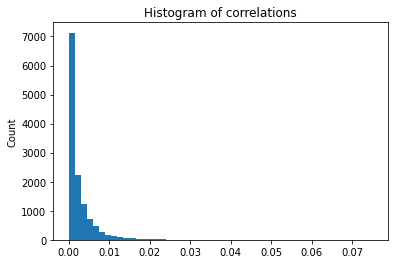

In [13]:
hist(corrs,"Histogram of correlations")

## Prob. of K neurons firing

In [21]:
p_k = np.bincount(np.sum(arr,axis=0))/M

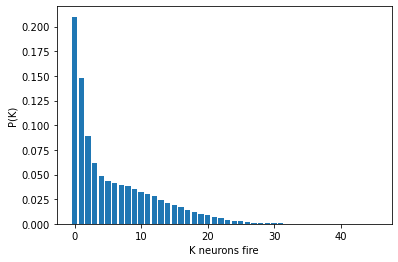

In [25]:
plt.bar(np.arange(len(p_k)),p_k)
plt.xlabel("K neurons fire within a bin")
plt.ylabel("P(K)")
plt.show()